In [527]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [529]:
import numpy as np
import pandas as pd

df = pd.read_csv('C:/Users/akasa/Downloads/abalone.csv',index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


Text(0.5, 1.0, 'Rings')

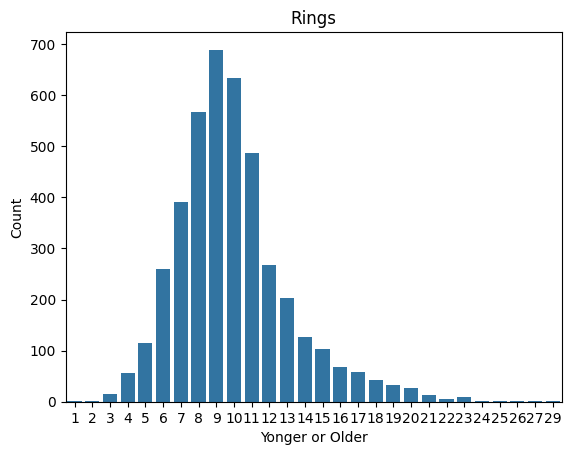

In [531]:
sns.countplot(data = df, x="Rings")
plt.xlabel("Yonger or Older")
plt.ylabel("Count")
plt.title("Rings")

In [533]:
df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

In [535]:
import pandas as pd
import matplotlib.pyplot as plt

# Rings 값이 3부터 23 사이인 데이터만 필터링
data = df[(df['Rings'] >= 3) & (df['Rings'] <= 23)]

# Rings의 고유한 값들을 0부터 시작하는 인덱스로 재매핑
unique_rings = sorted(data['Rings'].unique())  # 고유한 값들을 정렬
encoding_map = {ring: idx for idx, ring in enumerate(unique_rings)}  # 재매핑

# 인코딩 적용
df['Rings'] =data['Rings'].map(encoding_map)

# 결과 출력
print(df)

     Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
id                                                                 
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera_weight  Shell_weight  Rings  
id                                         
0             0.1010       

Text(0.5, 1.0, 'Rings')

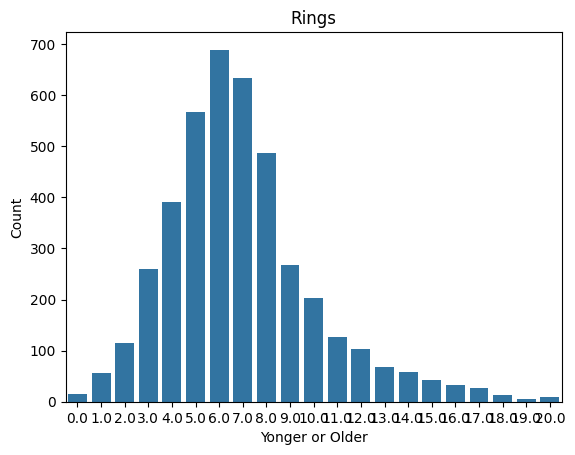

In [537]:
sns.countplot(data = df, x="Rings")
plt.xlabel("Yonger or Older")
plt.ylabel("Count")
plt.title("Rings")

In [381]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Step 1: One-Hot Encoding (성별 원 핫 인코딩)
one_hot = pd.get_dummies(df['Sex'], prefix='Sex')
print("One-Hot Encoding 결과:")
print(one_hot)

# Step 2: 'Sex' 열 삭제
df = df.drop('Sex', axis=1)
print("\n'Sex' 열 삭제 후 데이터프레임:")
print(df)

# Step 3: MinMaxScaler 적용
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

# Step 4: DataFrame으로 다시 변환
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
print("\nMinMaxScaler 적용 후 데이터프레임:")
print(df_scaled)

# Step 5: NaN 값 확인
print("\nNaN 값 확인 (정규화 후):")
print(df_scaled.isna().sum())

# Step 6: 원 핫 인코딩 결과와 결합
df_final = pd.concat([df_scaled, one_hot], axis=1)
print("\n최종 결합 후 데이터프레임:")
print(df_final)

# Step 7: NaN 값 확인 (결합 후)
print("\nNaN 값 확인 (결합 후):")
print(df_final.isna().sum())

# Step 8: 원 핫 인코딩한 열을 정수형으로 변환
df_final['Sex_F'] = df_final['Sex_F'].astype(int)
df_final['Sex_I'] = df_final['Sex_I'].astype(int)
df_final['Sex_M'] = df_final['Sex_M'].astype(int)

# 결과 출력
print("\n최종 변환 후 데이터프레임:")
print(df_final)


One-Hot Encoding 결과:
      Sex_F  Sex_I  Sex_M
id                       
0     False  False   True
1     False  False   True
2      True  False  False
3     False  False   True
4     False   True  False
...     ...    ...    ...
4172   True  False  False
4173  False  False   True
4174  False  False   True
4175   True  False  False
4176  False  False   True

[4177 rows x 3 columns]

'Sex' 열 삭제 후 데이터프레임:
      Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
id                                                                             
0      0.455     0.365   0.095        0.5140          0.2245          0.1010   
1      0.350     0.265   0.090        0.2255          0.0995          0.0485   
2      0.530     0.420   0.135        0.6770          0.2565          0.1415   
3      0.440     0.365   0.125        0.5160          0.2155          0.1140   
4      0.330     0.255   0.080        0.2050          0.0895          0.0395   
...      ...       ...     ...    

In [399]:
# NaN 값 확인
print("데이터에 NaN이 있는지 확인:")
print(df_final.isna().sum())

# Inf 값 확인
print("데이터에 무한대 값이 있는지 확인:")
print(np.isinf(df_final).sum())

데이터에 NaN이 있는지 확인:
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             9
Sex_F             0
Sex_I             0
Sex_M             0
dtype: int64
데이터에 무한대 값이 있는지 확인:
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
Sex_F             0
Sex_I             0
Sex_M             0
dtype: int64


In [539]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             9
dtype: int64

In [541]:
df = df.dropna()
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [543]:
import tensorflow as tf

#sex label encoding 1(label encoding)
target_label = df['Sex']
target_label.dtype
mapping = {'M':0, 'F':1,'I':2}
df['Sex'] = target_label.map(mapping)
target = df['Rings']
df = df.drop('Rings',axis=1)
df.head()
df.dropna()

#Sex label encoding 2(one-hot encoding)
#one_hot = pd.get_dummies(df['Sex'],prefix='Sex')
#df = df.drop('Sex',axis=1)
#df

C:\Users\akasa\AppData\Local\Temp\ipykernel_3992\1932512186.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = target_label.map(mapping)


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
id,,,,,,,,
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080


In [545]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled,columns=df.columns)
df_scaled

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,0.0,0.489362,0.491071,0.084071,0.179592,0.149445,0.132324,0.146707
1,0.0,0.340426,0.312500,0.079646,0.077196,0.065298,0.063199,0.066866
2,0.5,0.595745,0.589286,0.119469,0.237445,0.170986,0.185648,0.206587
3,0.0,0.468085,0.491071,0.110619,0.180302,0.143386,0.149440,0.151697
4,1.0,0.312057,0.294643,0.070796,0.069920,0.058566,0.051350,0.051896
...,...,...,...,...,...,...,...,...
4163,0.5,0.645390,0.642857,0.146018,0.311979,0.247391,0.314022,0.245509
4164,0.0,0.680851,0.625000,0.119469,0.340018,0.293840,0.281764,0.256986
4165,0.0,0.695035,0.687500,0.181416,0.414552,0.352070,0.377880,0.304391
4166,0.5,0.730496,0.705357,0.132743,0.385626,0.355772,0.342989,0.292415


In [547]:
df_scaled = df_scaled.fillna(df.mean())
df_scaled

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,0.0,0.489362,0.491071,0.084071,0.179592,0.149445,0.132324,0.146707
1,0.0,0.340426,0.312500,0.079646,0.077196,0.065298,0.063199,0.066866
2,0.5,0.595745,0.589286,0.119469,0.237445,0.170986,0.185648,0.206587
3,0.0,0.468085,0.491071,0.110619,0.180302,0.143386,0.149440,0.151697
4,1.0,0.312057,0.294643,0.070796,0.069920,0.058566,0.051350,0.051896
...,...,...,...,...,...,...,...,...
4163,0.5,0.645390,0.642857,0.146018,0.311979,0.247391,0.314022,0.245509
4164,0.0,0.680851,0.625000,0.119469,0.340018,0.293840,0.281764,0.256986
4165,0.0,0.695035,0.687500,0.181416,0.414552,0.352070,0.377880,0.304391
4166,0.5,0.730496,0.705357,0.132743,0.385626,0.355772,0.342989,0.292415


In [435]:
df = pd.concat([df_scaled,one_hot],axis=1)

df['Sex_F'] = df['Sex_F'].astype(int)
df['Sex_I'] = df['Sex_I'].astype(int)
df['Sex_M'] = df['Sex_M'].astype(int)

df

ValueError: cannot convert float NaN to integer

KeyError: 'Sex'

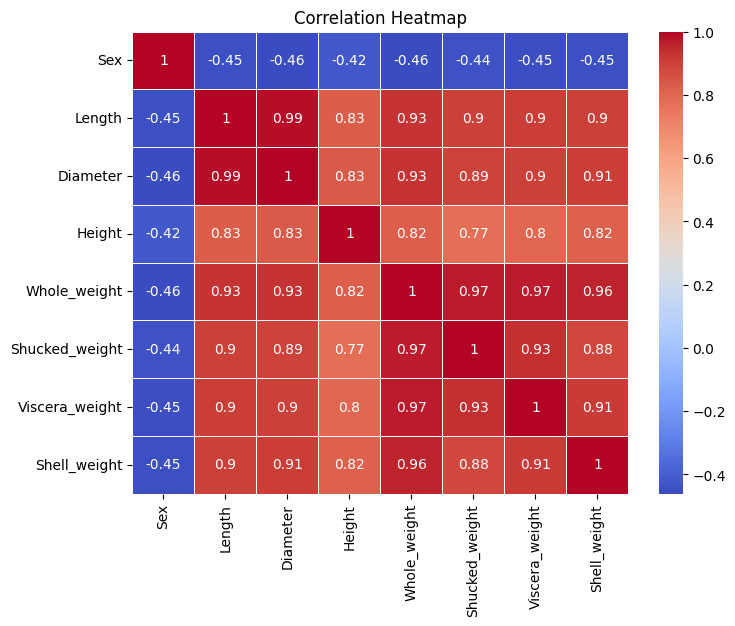

In [549]:
# 상관계수 계산
correlation_matrix = df.corr()

# Heatmap 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_0,Sex_1,Sex_2
id,,,,,,,,,,,
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,12.0,True,False,False
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,4.0,True,False,False
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,6.0,False,True,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,7.0,True,False,False
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,4.0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,8.0,False,True,False
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,7.0,True,False,False
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,6.0,True,False,False


In [553]:
#X = df.drop('Rings',axis=1)
#y = df['Rings'].values
y = target['Rings']
print(X)
print(y)

KeyError: "['Rings'] not found in axis"

In [517]:
#CNN에 맞게 input data 형식 변환
X = X.reshape(X.shape[0],X.shape[1],1)
X.shape

(4168, 10, 1)

In [411]:
#데이터 분할
X_train, X_test_val, Y_train, Y_test_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, Y_test, Y_val = train_test_split(X_test_val, Y_test_val, test_size=0.5, random_state=42)
print(X_train.shape,X_test.shape,X_val.shape)
print(Y_train.shape,Y_test.shape,Y_val.shape)

(3334, 10, 1) (417, 10, 1) (417, 10, 1)
(3334,) (417,) (417,)


Epoch 1/50
105/105 [==============================] - 1s 5ms/step - loss: 0.0156 - mae: 0.0904 - val_loss: 0.0133 - val_mae: 0.0873
Epoch 2/50
105/105 [==============================] - 0s 2ms/step - loss: 0.0132 - mae: 0.0832 - val_loss: 0.0119 - val_mae: 0.0757
Epoch 3/50
105/105 [==============================] - 0s 2ms/step - loss: 0.0120 - mae: 0.0792 - val_loss: 0.0116 - val_mae: 0.0771
Epoch 4/50
105/105 [==============================] - 0s 3ms/step - loss: 0.0117 - mae: 0.0779 - val_loss: 0.0119 - val_mae: 0.0809
Epoch 5/50
105/105 [==============================] - 0s 3ms/step - loss: 0.0120 - mae: 0.0794 - val_loss: 0.0122 - val_mae: 0.0730
Epoch 6/50
105/105 [==============================] - 0s 2ms/step - loss: 0.0113 - mae: 0.0768 - val_loss: 0.0132 - val_mae: 0.0790
Epoch 7/50
105/105 [==============================] - 0s 3ms/step - loss: 0.0111 - mae: 0.0754 - val_loss: 0.0149 - val_mae: 0.0967
Epoch 8/50
105/105 [==============================] - 0s 2ms/step - loss: 0.

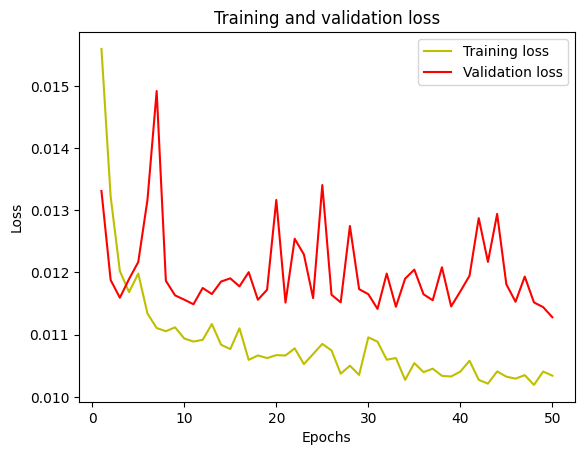

14/14 [==============================] - 0s 2ms/step - loss: 0.0113 - mae: 0.0734
Test MAE: 0.07335234433412552


In [413]:
#model 생성
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_test, Y_test))

# 손실 그래프 시각화
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

loss, mae = model.evaluate(X_test, Y_test)
print(f'Test MAE: {mae}')